In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = 'mnist'
K = 10001
batch_size = 32
full_grad = 32
num_of_nodes = 8
report = 100
trial_num = 1 # should be 10
eval_idx = [i for i in range(0, K, report)]
samples_in_total = {'a9a': 32561, 'miniboone': 100000, 'mnist': 60000}
samples_per_node = samples_in_total[data] // num_of_nodes
epoch_per_iter = batch_size / samples_per_node
# name_mapping = {'dsgt': 'DSGT', 'deepstormv2': 'DEEPSTORMv2', 'sppdm': 'SPPDM',\
#                 'proxgtsr': 'ProxGT-SR-E', 'proxdasa': 'Prox-DASA', 'proxdasagt': 'Prox-DASA-GT'}
name_mapping = {'dsgt': 'D-SGT', 'dsgd': 'D-SGD', 'proxdasagt': 'D-ASAGT',  'proxndasagt': 'D-NASA'}
# algorithms = ['sppdm', 'proxgtsr', 'deepstormv2', 'proxdasa', 'proxdasagt']
algorithms = ['dsgt', 'dsgd', 'proxdasagt', 'proxndasagt']
best_lr_list = {'dsgt': '100.0', 'dsgd': '100.0', 'proxdasagt': '100.0',  'proxndasagt': '1.0'}
# best_lr_list = {'dsgt': '1.0', 'dsgd': '1.0', 'proxdasagt': '10.0',  'proxndasagt': '1.0'}

# color_list = ['lightcoral', 'burlywood', 'lightseagreen', 'yellowgreen', 'blue']
# shadow_list = ['gainsboro', 'bisque', 'springgreen', 'yellow', 'cyan']

color_list = [(0, 158/255, 115/255), (86/255, 180/255, 233/255), 'burlywood', 'darkviolet', 'darkred']
shadow_list = [(178/255, 225/255, 212/255), (203/255, 232/255, 248/255), 'bisque', 'violet', 'lightcoral']

marker_list = ['*', 's', '^', 'o', '']

results_prefix = f'results/{data}/'

In [23]:
algo_num, idx_num = len(algorithms), len(eval_idx)
mnist_acc = np.zeros((trial_num, algo_num, idx_num))
mnist_train_loss = np.zeros((trial_num, algo_num, idx_num))
mnist_test_loss = np.zeros((trial_num, algo_num, idx_num))
mnist_stat = np.zeros((trial_num, algo_num, idx_num))
mnist_time = np.zeros((trial_num, algo_num, idx_num))
mnist_comm_time = np.zeros((trial_num, algo_num, idx_num))
mnist_comp_time = np.zeros((trial_num, algo_num, idx_num))
for j, algo in enumerate(algorithms):
    for i in range(trial_num):
        result = np.load(results_prefix + '{}_t_{}_random_{}_{}_lr_{}_step_constant.npy'.format(algo, i+1, batch_size, K, best_lr_list[algo]), allow_pickle=True)
        if algo in ['dsgt', 'dsgd']:
            for idd, res in enumerate(result):
                if len(res) == len(eval_idx) + 1:
                    result[idd] = res[1:]
                    
        mnist_test_loss[i][j] = result[0]
        mnist_acc[i][j] = result[1]
        mnist_train_loss[i][j] = result[2]
        mnist_stat[i][j] = result[8]
        time = result[12]
        comm_time = result[13]
        comp_time = result[14]
        for k in range(K // report + 1):
            mnist_time[i][j][k] = sum(time[: k*report])
            mnist_comm_time[i][j][k] = sum(comm_time[: k*report])
            mnist_comp_time[i][j][k] = sum(comp_time[: k*report])

In [24]:
mnist_acc_avg = np.mean(mnist_acc, axis=0)
mnist_acc_std = np.std(mnist_acc, axis=0)
mnist_train_loss_avg = np.mean(mnist_train_loss, axis=0)
mnist_train_loss_std = np.std(mnist_train_loss, axis=0)
mnist_test_loss_avg = np.mean(mnist_test_loss, axis=0)
mnist_test_loss_std = np.std(mnist_test_loss, axis=0)
mnist_stat_avg = np.mean(mnist_stat, axis=0)
mnist_stat_std= np.std(mnist_stat, axis=0)
mnist_time_avg = np.mean(mnist_time, axis=0)
mnist_time_std = np.std(mnist_time, axis=0)
mnist_comm_time_avg = np.mean(mnist_comm_time, axis=0)
mnist_comp_time_avg = np.mean(mnist_comp_time, axis=0)

In [25]:
mnist_acc_avg[:,-1], mnist_train_loss_avg[:,-1], mnist_stat_avg[:,-1]

(array([98.82, 98.93, 98.53, 98.92]),
 array([0.00258415, 0.00254247, 0.01713025, 0.01268853]),
 array([0.00401272, 0.0012848 , 0.00429731, 0.00388629]))

In [26]:
# obtain the data used for the table
comm_per_iter, comp_per_iter, time_per_iter = [], [], []
comm_total, comp_total, time_total = [], [], []
for i, algo in enumerate(algorithms):
    comm_per_iter.append(mnist_comm_time_avg[i][-1] / K)
    comp_per_iter.append(mnist_comp_time_avg[i][-1] / K)
    time_per_iter.append(mnist_time_avg[i][-1] / K)
    comm_total.append(mnist_comm_time_avg[i][-1])
    comp_total.append(mnist_comp_time_avg[i][-1])
    time_total.append(mnist_time_avg[i][-1])

In [27]:
comm_per_iter, comp_per_iter, time_per_iter

([0.0039581641835819015,
  0.003903089691031153,
  0.005572812718728151,
  0.005481431856814506],
 [0.02768979102089737,
  0.027825027497249712,
  0.029096990300970356,
  0.02802461753824612],
 [0.03164795520447911,
  0.03172811718828094,
  0.034669803019698166,
  0.03350604939506033])

In [28]:
comm_total, comp_total, time_total

([39.5856000000026, 39.03480000000256, 55.73370000000023, 54.81980000000188],
 [276.9255999999946,
  278.27809999999437,
  290.9990000000045,
  280.27419999999944],
 [316.5111999999956,
  317.3128999999977,
  346.73270000000133,
  335.09399999999835])

In [29]:
proxgtsr_epoch_list, epoch_list, epochs = [], [], 0
epoch_per_report = report * epoch_per_iter
for i in range(0, K, report):
    epoch_list.append(epochs)
    proxgtsr_epoch_list.append(epochs + (i // full_grad))
    epochs += epoch_per_report
# gtsr_cut_off = 0
# while proxgtsr_epoch_list[gtsr_cut_off] < 20:
#     gtsr_cut_off += 1
gtsr_cut_off = 100

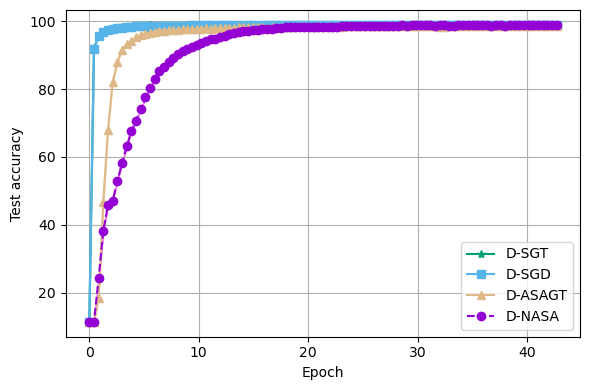

In [30]:
# test accuracy vs. epoch
for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Epoch')
    ax.set_ylabel('Test accuracy')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(epoch_list, mnist_acc_avg[k], '--', marker=marker_list[k], label=name_mapping[algo], color=color_list[k]) # , linewidth=0.1, markersize=3,
            plt.fill_between(epoch_list, \
                    mnist_acc_avg[k]-1.96 * mnist_acc_std[k] / np.sqrt(10), \
                    mnist_acc_avg[k]+ 1.96 * mnist_acc_std[k]/np.sqrt(10), color=shadow_list[k])
        elif algo != 'proxgtsr':
            plt.plot(epoch_list, mnist_acc_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, \
                    mnist_acc_avg[k]-1.96 * mnist_acc_std[k] / np.sqrt(10), \
                    mnist_acc_avg[k]+ 1.96 * mnist_acc_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(proxgtsr_epoch_list[:gtsr_cut_off], mnist_acc_avg[k][:gtsr_cut_off], \
                     marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(proxgtsr_epoch_list[:gtsr_cut_off], \
                     mnist_acc_avg[k][:gtsr_cut_off]-1.96 * mnist_acc_std[k][:gtsr_cut_off]/ np.sqrt(10), \
                     mnist_acc_avg[k][:gtsr_cut_off]+1.96 *mnist_acc_std[k][:gtsr_cut_off]/ np.sqrt(10), color=shadow_list[k])
            
#             plt.plot(epoch_list, mnist_acc_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
#             plt.fill_between(epoch_list, \
#                     mnist_acc_avg[k]-1.96 * mnist_acc_std[k] / np.sqrt(10), \
#                     mnist_acc_avg[k]+ 1.96 * mnist_acc_std[k]/np.sqrt(10), color=shadow_list[k])
plt.legend()
plt.grid()
plt.savefig('plots/mnist_acc_epo_full_const_step.pdf')
plt.show()

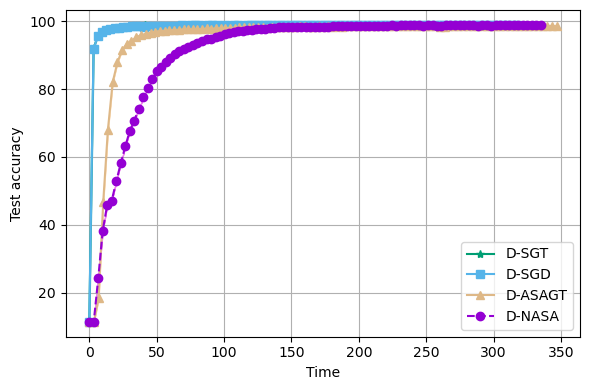

In [31]:
# test accuracy vs. time
for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Time')
    ax.set_ylabel('Test accuracy')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(mnist_time_avg[k], mnist_acc_avg[k], '--', marker=marker_list[k], \
                     label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_acc_avg[k]-1.96*mnist_acc_std[k]/np.sqrt(10), \
                         mnist_acc_avg[k]+1.96 * mnist_acc_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(mnist_time_avg[k], mnist_acc_avg[k], marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_acc_avg[k]-1.96*mnist_acc_std[k]/np.sqrt(10), \
                         mnist_acc_avg[k]+1.96 * mnist_acc_std[k]/np.sqrt(10), color=shadow_list[k])
plt.legend()
plt.grid()
plt.savefig('plots/mnist_acc_time_const_step.pdf')
plt.show()

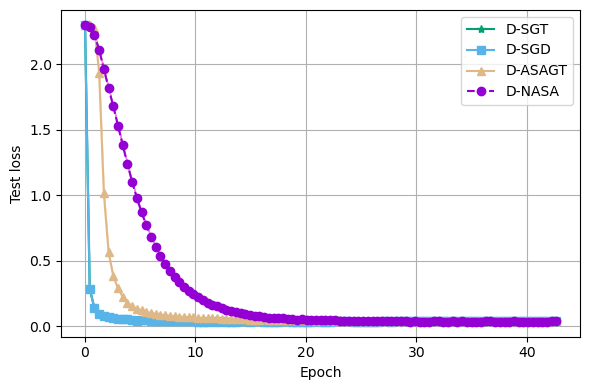

In [32]:
# test loss vs. epoch
for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Epoch')
    ax.set_ylabel('Test loss')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(epoch_list, mnist_test_loss_avg[k], '--', marker=marker_list[k], \
                     label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, mnist_test_loss_avg[k]-1.96 * mnist_test_loss_std[k] / np.sqrt(10), \
                             mnist_test_loss_avg[k]+ 1.96 * mnist_test_loss_std[k]/np.sqrt(10), color=shadow_list[k])
        elif algo != 'proxgtsr':
            plt.plot(epoch_list, mnist_test_loss_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, mnist_test_loss_avg[k]-1.96 * mnist_test_loss_std[k] / np.sqrt(10), \
                             mnist_test_loss_avg[k]+ 1.96 * mnist_test_loss_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(proxgtsr_epoch_list[:gtsr_cut_off], mnist_test_loss_avg[k][:gtsr_cut_off], \
                     marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(proxgtsr_epoch_list[:gtsr_cut_off], \
             mnist_test_loss_avg[k][:gtsr_cut_off]-1.96 * mnist_test_loss_std[k][:gtsr_cut_off]/ np.sqrt(10), \
             mnist_test_loss_avg[k][:gtsr_cut_off]+1.96 *mnist_test_loss_std[k][:gtsr_cut_off]/ np.sqrt(10), color=shadow_list[k])
            
#             plt.plot(epoch_list, mnist_test_loss_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
#             plt.fill_between(epoch_list, mnist_test_loss_avg[k]-1.96 * mnist_test_loss_std[k] / np.sqrt(10), \
#                              mnist_test_loss_avg[k]+ 1.96 * mnist_test_loss_std[k]/np.sqrt(10), color=shadow_list[k])
            
plt.legend()
plt.grid()
plt.savefig('plots/mnist_loss_epo_full_const_step.pdf')
plt.show()

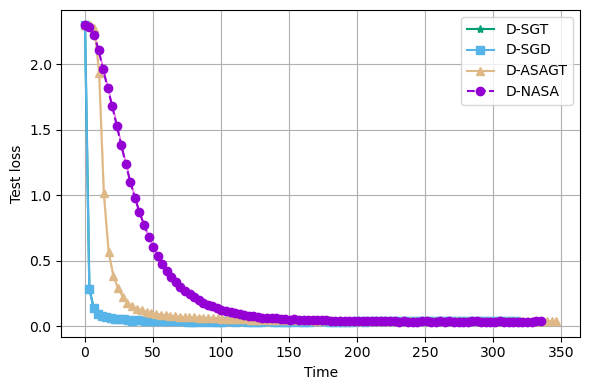

In [33]:
# test loss vs. time

for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Time')
    ax.set_ylabel('Test loss')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(mnist_time_avg[k], mnist_test_loss_avg[k], '--', marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_test_loss_avg[k]-1.96*mnist_test_loss_std[k]/np.sqrt(10), \
                         mnist_test_loss_avg[k]+1.96 * mnist_test_loss_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(mnist_time_avg[k], mnist_test_loss_avg[k], marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_test_loss_avg[k]-1.96*mnist_test_loss_std[k]/np.sqrt(10), \
                         mnist_test_loss_avg[k]+1.96 * mnist_test_loss_std[k]/np.sqrt(10), color=shadow_list[k])
plt.legend()
plt.grid()
plt.savefig('plots/mnist_loss_time_const_step.pdf')
plt.show()

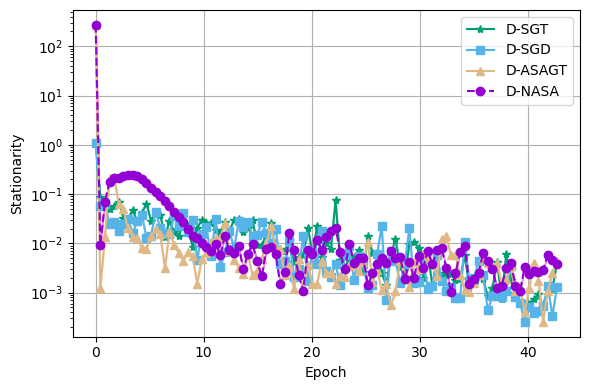

In [34]:
# stationarity vs. epoch
for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Epoch')
    ax.set_ylabel('Stationarity')
    ax.set_yscale('log')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(epoch_list, mnist_stat_avg[k], '--', marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, \
                mnist_stat_avg[k]-1.96 * mnist_stat_std[k] / np.sqrt(10), \
                mnist_stat_avg[k]+ 1.96 * mnist_stat_std[k]/np.sqrt(10), color=shadow_list[k])
        elif algo != 'proxgtsr':
            plt.plot(epoch_list, mnist_stat_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, \
                mnist_stat_avg[k]-1.96 * mnist_stat_std[k] / np.sqrt(10), \
                mnist_stat_avg[k]+ 1.96 * mnist_stat_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(proxgtsr_epoch_list[:gtsr_cut_off], mnist_stat_avg[k][:gtsr_cut_off], \
                     marker=marker_list[k],label=name_mapping[algo], color=color_list[k])
            plt.fill_between(proxgtsr_epoch_list[:gtsr_cut_off], \
             mnist_stat_avg[k][:gtsr_cut_off]-1.96 * mnist_stat_std[k][:gtsr_cut_off]/ np.sqrt(10), \
             mnist_stat_avg[k][:gtsr_cut_off]+1.96 *mnist_stat_std[k][:gtsr_cut_off]/ np.sqrt(10), color=shadow_list[k])
            
#             plt.plot(epoch_list, mnist_stat_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
#             plt.fill_between(epoch_list, \
#                 mnist_stat_avg[k]-1.96 * mnist_stat_std[k] / np.sqrt(10), \
#                 mnist_stat_avg[k]+ 1.96 * mnist_stat_std[k]/np.sqrt(10), color=shadow_list[k])
            
plt.legend()
plt.grid()
plt.savefig('plots/mnist_stat_epo_full_const_step.pdf')
plt.show()

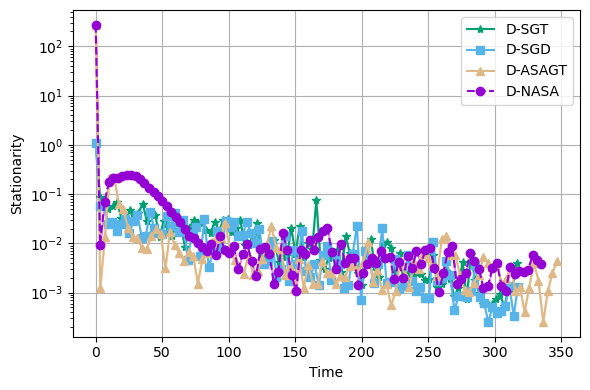

In [35]:
# stationarity vs. time
for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Time')
    ax.set_ylabel('Stationarity')
    ax.set_yscale('log')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(mnist_time_avg[k], mnist_stat_avg[k], '--', marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_stat_avg[k]-1.96*mnist_stat_std[k]/np.sqrt(10), \
                         mnist_stat_avg[k]+1.96 * mnist_stat_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(mnist_time_avg[k], mnist_stat_avg[k], marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_stat_avg[k]-1.96*mnist_stat_std[k]/np.sqrt(10), \
                         mnist_stat_avg[k]+1.96 * mnist_stat_std[k]/np.sqrt(10), color=shadow_list[k])
plt.legend()
plt.grid()
plt.savefig('plots/mnist_stat_time_const_step.pdf')
plt.show()

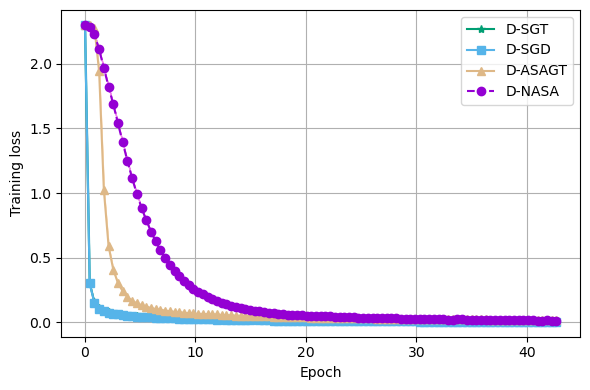

In [36]:
# train loss vs. epoch
for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Epoch')
    ax.set_ylabel('Training loss')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(epoch_list, mnist_train_loss_avg[k], '--', marker=marker_list[k], \
                     label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, mnist_train_loss_avg[k]-1.96 * mnist_train_loss_std[k] / np.sqrt(10), \
                             mnist_train_loss_avg[k]+ 1.96 * mnist_train_loss_std[k]/np.sqrt(10), color=shadow_list[k])
        elif algo != 'proxgtsr':
            plt.plot(epoch_list, mnist_train_loss_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
            plt.fill_between(epoch_list, mnist_train_loss_avg[k]-1.96 * mnist_train_loss_std[k] / np.sqrt(10), \
                             mnist_train_loss_avg[k]+ 1.96 * mnist_train_loss_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(proxgtsr_epoch_list[:gtsr_cut_off], mnist_train_loss_avg[k][:gtsr_cut_off], \
                     marker=marker_list[k],label=name_mapping[algo], color=color_list[k])
            plt.fill_between(proxgtsr_epoch_list[:gtsr_cut_off], \
             mnist_train_loss_avg[k][:gtsr_cut_off]-1.96 * mnist_train_loss_std[k][:gtsr_cut_off]/ np.sqrt(10), \
             mnist_train_loss_avg[k][:gtsr_cut_off]+1.96 *mnist_train_loss_std[k][:gtsr_cut_off]/ np.sqrt(10), color=shadow_list[k])
            
#             plt.plot(epoch_list, mnist_train_loss_avg[k], marker=marker_list[k], label=name_mapping[algo], color=color_list[k])
#             plt.fill_between(epoch_list, mnist_train_loss_avg[k]-1.96 * mnist_train_loss_std[k] / np.sqrt(10), \
#                              mnist_train_loss_avg[k]+ 1.96 * mnist_train_loss_std[k]/np.sqrt(10), color=shadow_list[k])
            
plt.legend()
plt.grid()
plt.savefig('plots/mnist_train_loss_epo_full_const_step.pdf')
plt.show()

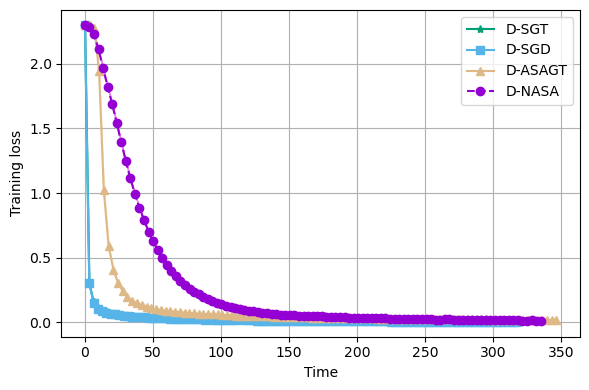

In [37]:
# train loss vs. time

for data in ['mnist']:
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
    plt.xlabel('Time')
    ax.set_ylabel('Training loss')
    for k, algo in enumerate(algorithms):
        if algo == 'proxndasagt':
            plt.plot(mnist_time_avg[k], mnist_train_loss_avg[k], '--', marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_train_loss_avg[k]-1.96*mnist_train_loss_std[k]/np.sqrt(10), \
                         mnist_train_loss_avg[k]+1.96 * mnist_train_loss_std[k]/np.sqrt(10), color=shadow_list[k])
        else:
            plt.plot(mnist_time_avg[k], mnist_train_loss_avg[k], marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
            plt.fill_between(mnist_time_avg[k], mnist_train_loss_avg[k]-1.96*mnist_train_loss_std[k]/np.sqrt(10), \
                         mnist_train_loss_avg[k]+1.96 * mnist_train_loss_std[k]/np.sqrt(10), color=shadow_list[k])
plt.legend()
plt.grid()
plt.savefig('plots/mnist_train_loss_time_const_step.pdf')
plt.show()

In [38]:
trial_num = 1
data = 'mnist'
stepsize_list = ["0.005", "0.01", "0.05", "0.1", "0.5", "1.0", "5.0", "10.0", "50.0", "100.0"]

res_list = {algo: [] for algo, _ in name_mapping.items()}
for algo, name in name_mapping.items():
    for stepsize in stepsize_list:
        result = np.load(results_prefix + '{}_t_{}_random_{}_{}_lr_{}_step_constant.npy'.format(algo, 1, batch_size, K, stepsize), allow_pickle=True)
        if algo in ['dsgt', 'dsgd']:
            for idd, res in enumerate(result):
                if len(res) == len(eval_idx) + 1:
                    result[idd] = res[1:]
        
        res_list[algo].append(max(result[1]))       

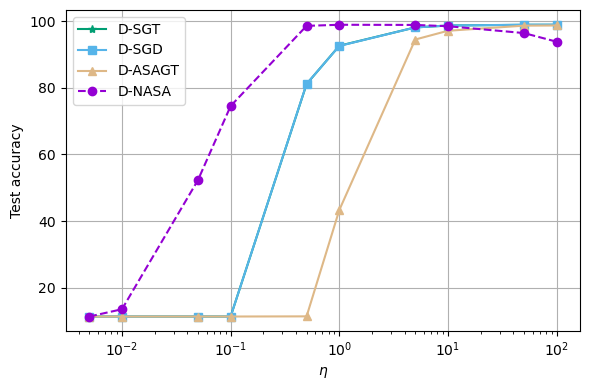

In [39]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
plt.xlabel('$\eta$')
plt.xscale("log")
ax.set_ylabel('Test accuracy')
for k, algo in enumerate(algorithms):
    if algo == 'proxndasagt':
        plt.plot([float(s) for s in stepsize_list], res_list[algo], '--', marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
    else:
        plt.plot([float(s) for s in stepsize_list], res_list[algo], marker=marker_list[k], label=name_mapping[algo], color = color_list[k])
plt.legend()
plt.grid()
plt.savefig('plots/mnist_acc_different_stepsize_constant.pdf')
plt.show()

In [49]:
stepsize_list, res_list

(['0.005', '0.01', '0.05', '0.1', '0.5', '1.0', '5.0', '10.0', '50.0'],
 {'dsgt': [11.35, 11.35, 11.35, 11.35, 60.91, 89.02, 97.57, 98.48, 97.56],
  'dsgd': [11.35, 11.35, 11.35, 11.35, 60.4, 89.12, 97.44, 98.37, 95.66],
  'proxdasagt': [11.35,
   11.35,
   11.35,
   11.35,
   43.62,
   85.36,
   97.22,
   98.29,
   98.35],
  'proxndasagt': [26.37,
   42.5,
   89.55,
   97.69,
   99.03,
   98.62,
   96.96,
   11.35,
   11.35]})

In [ ]:
# import torch
# import numpy
# import math
# from mpi4py import MPI
# from torchvision import datasets, transforms

# size=10
# rank=1
# mini_batch = 32

# # Create transform for data
# transform = transforms.Compose([transforms.ToTensor(),
#                             transforms.Normalize((0.1307,), (0.3081,))])

# # Subset data to local agent
# num_samples = 60000 // size
# train_loader = torch.utils.data.DataLoader(
#     datasets.FashionMNIST('data', train=True, download=True,
#                 transform=transform),
#     batch_size=mini_batch, sampler=torch.utils.data.SubsetRandomSampler(
#     [i for i in range(int(rank * num_samples), int((rank + 1) * num_samples))]))

# # Load data to be used to compute full gradient with neighbors
# optimality_loader = torch.utils.data.DataLoader(
#     datasets.FashionMNIST('data', train=True, download=True,
#                 transform=transform),
#     batch_size=num_samples, sampler=torch.utils.data.SubsetRandomSampler(
#     [i for i in
#         range(int(rank * num_samples), int((rank + 1) * num_samples))]))  # Difference is in number of samples!!

# # Load the testing data
# num_test = 10000 // size
# test_loader = torch.utils.data.DataLoader(
#     datasets.FashionMNIST('data', train=False, transform=transform),
#     batch_size=num_test, sampler=torch.utils.data.SubsetRandomSampler(
#         [i for i in range(int(rank * num_test), int((rank + 1) * num_test))]))